# Machine learning from scratch: Logistic regression

## Introduction

In this notebook, we will build the algorithm for finding a logistic regression model for classification of data in two different classes. This method yields a linear decision boundary, so the data to analyze must be (approximately) linearly separable. We start by importing some scientific libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will generate (pseudo) random data divided in two classes, centered at the points $\left[-1, 0\right]$ and $\left[1, 4\right]$. These classes have a multivariate Gaussian distribution around the centers, with specified covariance matrices. We also set the number of observations.

In [2]:
num_observations = 5000
x0 = np.random.multivariate_normal([-1, 0], [[1, .75],[.75, 1]], num_observations)
x1 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

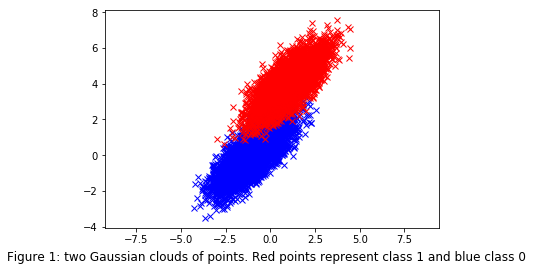

In [3]:
plt.plot(x0[:,0],x0[:,1],'x',color='blue')
plt.plot(x1[:,0],x1[:,1],'x',color='red')
plt.figtext(0.5, 0.01, 'Figure 1: two Gaussian clouds of points. Red points represent class 1 and blue class 0', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

We will assign to each of these points a corresponding class, labeled by $\{ 0,1\}$. Then we stack the vectors points in the same vectors, so we have a single vector of training examples ($X$) and a single vector of labels ($Y$).

In [4]:
y0 = np.zeros(len(x0))
y1 = np.ones(len(x1))

X =  np.vstack((x0,x1))
Y = np.append(y0,y1)

One of the main functions of the algorithm is the sigmoid function. This is defined as on the real numbers by

\begin{align*}
g(x) &= \dfrac{1}{1+\exp(-x)} ,\\ 
g'(x) &= g(x)(1-g(x)).
\end{align*}

We extend its action to vectors of arbitrary length by acting componentwise.

In [5]:
def sigmoid(v):
    return 1/(1 + np.exp(-v))

## The model

Suppose we count with a set of examples $X = \{x^{(1)},\dots,x^{(m)} \}$ labeled with their corresponding classes $Y = \{y^{(1)},\dots,y^{(m)}\}$. Our goal is finding a function $h(\cdot,\cdot)$ and a parameter $\theta$ such that for a new example $x^{(m+1)}$, we have

$$
\mathbb{P}(y^{(m+1)}=1 \ |\ x^{(m+1)}) = h(\theta,x).
$$

We will try to separate the two datasets with a linear manifold (straight line), which can be written as $\ell(\theta)=\{ (x_1,x_2) : \theta_0 + x_2\theta_1 + x_2\theta_2 \}$ for some parameters $\theta_0,\theta_1,\theta_2$. Then, it is reasonable to assume that the probability that a given point $(x_1,x_2)$ is at either side of the line depends linearly on the components of the point $(x_1,x_2)$. Now, trying to adjust $\mathbb{P}(y^{(m+1)}=1 \ |\ \theta, \ x^{(m+1)})$ with a linear function of the form $\theta_0 + x_1\theta_1 + x_2\theta_2 $, as this would predict negative values for a probability for vectors in a certain region, as well as values larger than $1$ for vectors in another region. Thus we scale the interval $[0,1]$ to the whole real line, so we can fit a linear function to this scaling. In general, there are many (arbitrary) ways to do that, but we choose one of the most widespread choices:

$$
h(\theta,x)= \mathbb{P}(y =1 \ |\ \theta, \ x)= \dfrac{1}{1+\exp(-(\theta_0+x_1\theta_1 +x_2\theta_2))} = g(\theta\cdot (1,x_1,x_2)).
$$

This transformation makes the log of the odds linear. For classification problems, we will define a threshold $t_0$ such that we say that a new example $(x_1,x_2)$ belongs to the class $1$ if $P(y=1 \ | \ \theta, \ x)\geq t_0$ and belongs to the class $0$ otherwise. In general we will take this threshold to be $t_0=1/2$. We introduce the notation $x_0=1$ for all examples.

Now we address the question of how to find such parameters. Again, there are many ways to do this. There are two main different approaches that one could follow:
+ Minimize a cost/error function of the form $C(\theta)$ that takes into account the deviations of the predicted class for training examples with respect to the labels of such examples.
+ Construct parametric estimators $\theta$ according to statistical methods of parameter estimations, such as maximum likelihood or the method of moments.

In many cases these two approaches are equivalent, but we will follow the second one as it makes the mathematical foundations more clear. In particular we will follow the method of maximum likelihood.

## Maximum likelihood

In our model, given our sets of training examples $X,Y$, if we fix the parameter vector $\theta$, then for a new training example $x$, $y$ can take the value $1$ with probability $\mathbb{P}(y=1 \ | \ \theta, \ x)=h(\theta,x)$ and the value $0$ with probability  $1-\mathbb{P}(y=1 | \ \theta, \ x)$. We define the **likelihood function** by

$$
\mathcal{L}(\theta ) = \mathcal{L}(\theta \ | \ X,Y) = \prod_{k=1}^m \mathbb{P}(y = y^{(k)} \ | \ \theta, X)
$$

where the product ranges over all the training examples. With the observation above, we can write this function as

$$
\mathcal{L}(\theta ) =  \prod_{k=1}^m  (h(\theta,x^{(k)}))^{y^{(k)}} (1-h(\theta,x^{(k)}))^{1-y^{(k)}}
$$

for $t\in\{ 0,1\}$. The **maximum likelihood estimate** is defined by the following relation

$$
\theta^*\in\mathbb{R}^3 : \mathcal{L}(\theta^*  | \ x) = \sup_\theta \mathcal{L}(\theta \ | \ x).
$$

The existence or uniqueness of such parameter are not obvious. If there are more than one parameter achieving the supremum, we pick any of them. The maximization of $\mathcal{L}$ is equivalent to the minimization of $-\log \mathcal{L}$, which can be written as

$$
-\log\mathcal{L} = \sum_{k=1}^m -y^{(k)}\log (h(\theta,x^{(k)})) -(1-y^{(k)})\log(1-h(\theta,x^{(k)})).
$$

This quantity is more convenient to work with, as dealing with products of small numbers can cause computational problems. Let

$$
C(\theta)= \dfrac{1}{m}(-\log\mathcal{L}) = \dfrac{1}{m}\sum_{k=1}^m -y^{(k)}\log (h(\theta,x^{(k)})) -(1-y^{(k)})\log(1-h(\theta,x^{(k)})).
$$

Many sources call this function a **cost function**, and hence our notation, in which the dependence on $X$ and $Y$ is implicit. In this sense, our approach becomes a cost function minimization. This function can be writen in vectorized to make computations more efficient:

$$
C(\theta) = \dfrac{1}{m}(Y^T\log(g(X\theta))-(1-Y^T)\log(1-g(X\theta))).
$$

## Properties of $\theta^*$

The estimator $\theta^*$ given by the maximum likelihood method has several good properties that make it useful. We will state some of them without precising on the formal meaning or giving the proofs. Assuming that the dataset is linearly separable, then
+ Consistency: as we increase the number of training examples, $\theta^*$ converges (in a precise way) to a parameter $\theta_0$ that correctly classifies all the observed data.
+ Asymptotic efficiency: the fluctuations of the estimated parameter $\theta^*$ with respect to the *true* parameter of the model $\theta_0$ satisfy a central limit theorem, i.e., are asymptotically normally distributed. It is also possible to compute the order of such fluctuations.

In practice it is not always the case that the data is linearly separable, but this method still yields a reasonable approximation. It is important to evaluate this before choosing this model to make predictions with our data, as there are other models which might yield better predictions.

## Building the regression

We start by initializing the parameter $\theta$ to a small random value, to break the symmetry of the system and avoid the algorithm getting stuck.

In [6]:
theta = 2*np.random.rand(X.shape[1]+1)-1

We implement the cost function, that computes the current total cost as a function of the parameter $\theta$. It also appears to be a function of the dataset, but this parameter will be fixed throughout the whole notebook. This implementation of the cost function is vectorized.

In [7]:
def cost_function(X, Y, theta):
    m = X.shape[0]
    M = np.hstack(((np.ones(X.shape[0])).reshape(-1,1),X))
    h = sigmoid(M.dot(theta))
    J = (1/m)*(-(Y.T).dot(np.log(h)) - ((1-Y).T).dot(np.log(1-h)))
    return J

We will use gradient descent as the optimization algorithm, and hence, we will need the gradient of the cost function with respect to the parameter $\theta$. We proceed componentwise using the chain rule: for $j=0,1,2$, we have
$$
\begin{align*}
\dfrac{\partial C}{\partial \theta_j} &= \dfrac{1}{m}\sum_{k=1}^m\dfrac{\partial }{\partial \theta_j} \left( -y^{(k)}\log (h(\theta,x^{(k)}))\right) - \dfrac{\partial }{\partial \theta_j}(1-y^{(k)})\log(1-h(\theta,x^{(k)}))\\
&=\dfrac{1}{m}\sum_{k=1}^m -y_jx_j\dfrac{g'(\theta\cdot(1,x_1,x_2))}{h(\theta,X)} + (1-y^{(k)})x_j\dfrac{g'(\theta\cdot(1,x_1,x_2))}{1-h(\theta,x^{(k)})} \\
&= \dfrac{1}{m}\sum_{k=1}^m -y^{(k)}x_j \dfrac{h(\theta,x^{(k)})}{h(\theta,x^{(k)})} +(1-y^{(k)})x_j\dfrac{h(\theta,x^{(k)})(1-h(\theta,x^{(k)}))}{1-h(\theta,x^{(k)})}\\
&=\dfrac{1}{m}\sum_{k=1}^m x_j(h(\theta,x^{(k)})-y^{(k)}).
\end{align*}
$$
Again, we write this in vectorized form:

$$
\nabla_\theta C = \dfrac{1}{m}X^T(g(X\theta)-Y).
$$

In [8]:
def gradient(X, Y, theta):
    m = X.shape[0]
    M = np.hstack(((np.ones(X.shape[0])).reshape(-1,1),X))
    return (1/m)*np.array((M.T).dot(sigmoid(M.dot(theta))-Y))

## Gradient descent

In order to find the minimum of the cost function, we use [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). For this, we start with a random value of $\theta$, and then follow the direction in which the gradient points:

$$
\theta \mapsto \theta -\alpha \nabla_\theta C.
$$

Here $\alpha$ is the **learning rate**, a parameter which controls the weight assigned to the gradient when substracting it from the parameter. A small learning rate is more likely to yield convergence to the optimum, but at the cost of taking more iterations. On the other hand, a large learning rate can converge faster, but it might miss the optimum. The learning rate is a [hyperparemeter](https://en.wikipedia.org/wiki/Hyperparameter) of the algorithm.

In [9]:
def logistic_regression(X, Y, num_steps, learn_rate):
    theta = 2*np.random.rand(X.shape[1]+1)-1
    for i in range(0,num_steps):
        grad = gradient(X,Y,theta)
        theta = theta - learn_rate*np.array(grad)
    return theta

Now we run our model and store the parameters obtained to later plot the line defined by such parameters.

In [10]:
theta = logistic_regression(X,Y,2000,0.1)

We plot now our dataset and the corresponding line:

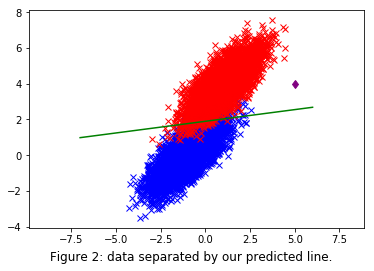

In [11]:
plt.plot(x0[:,0],x0[:,1],'x',color='blue')
plt.plot(x1[:,0],x1[:,1],'x',color='red')
plt.plot(5,4,'d',color='purple')
plt.figtext(0.5, 0.01, 'Figure 2: data separated by our predicted line.', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
x_range = np.array(range(-7,7))
plt.plot(x_range,-(theta[0])/theta[2] - (theta[1]/theta[2])*x_range , 'green' )
plt.show()

This algorithm not only provides a binary classification, but also, for a new point of data, it provides a way to assign a probability how likely is that a point belongs to the class $1$ (red cloud).

In [12]:
def predict_prob(z,theta):
    return sigmoid(theta[0]+z[0]*theta[1]+z[1]*theta[2])

P = predict_prob([5,4],theta)
print(P)

0.9774117781336015


Thus, the purple has probability $P$ to belong to the red class according to this model. Finally, we remark that the separating line is not unique in general.